## Goals: to measure the frequency of features selected across different models

# Import packages and directories

In [50]:
import os
import pandas as pd 
import numpy as np
from collections import Counter


In [51]:
#functions for use

def FilterList(list, keyWords_primary, keyWords_secondary = ["Empty"], omit = ["Empty"]):
    #store the filtered result
    filteredList = []

    if keyWords_secondary == ["Empty"]:
        for c in list: #loop the columns
            for buzz in keyWords_primary: #loop the key words
                if buzz in c: #if the column contains the key word
                    filteredList.append(c) #add the column to the list
                    break #do not continue testing primary key words for this column
    
    else: 
        for c in list: #loop the columns
            for buzz in keyWords_primary: #loop the key words
                if buzz in c: #if the column contains the key word
                    for secondary in keyWords_secondary:
                        if secondary in c:
                            filteredList.append(c) #add the column to the list
                            break #has been added to list based on passing the seondary 
                        else:
                            pass
                    break #do not continue to check primary key words for this column
                else:
                    pass
                
    if omit != ["Empty"]: 
        for x in omit: 
            for a in filteredList:
                if x in a:
                    filteredList.remove(a)
    
    #by iterating through the column names first, we keep the order of the columns

    return filteredList 

In [52]:
#to excel function
def outputToExcel(df_data, fileName_header, fileName_Common, fileName_suffix,
                  parent_dir, folderName, sheetName):
    fileName = fileName_header + fileName_Common + fileName_suffix
    outfile_extension = '.xlsx'
    outfile_boxplts = fileName + outfile_extension
    path_out= os.path.join(parent_dir, folderName, outfile_boxplts)

    if os.path.exists(path_out):
            #if old sheet
            with pd.ExcelWriter(path_out, mode = 'a', if_sheet_exists = 'overlay') as writer:
                    df_data.to_excel(writer, sheet_name = sheetName, index = True)
    else: 
            #new sheet
            with pd.ExcelWriter(path_out) as writer:
                    df_data.to_excel(writer, sheet_name = sheetName, index = True) #if new sheet

In [53]:
#make folder path for data
def makeFolderPathForData(parent_dir, folderName_header, folderName_common, folderName_suffix):
    #makes a new directory for your files
    #returns the folder name for use in other functions
    folderName = folderName_header + folderName_common + folderName_suffix
    path = os.path.join(parent_dir,folderName)
    if not os.path.exists(path):
        os.mkdir(path)
    return folderName

In [54]:
#find current directory
#location of original data
starting_directory = os.getcwd()

new_dirrectory = 'C:/Users/mcremer/UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects/Cardiac-Amyloidosis-Multiple-Myeloma/013 Analyzed Data outputs'
# "C:/Users/mcremer/UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects/Cardiac-Amyloidosis-Multiple-Myeloma/013 Analyzed Data outputs"
os.chdir(new_dirrectory)
#change working directory to where the data is stored

#create file naming system for data outputs

## importing data form different sheets to different dataframes

In [55]:
#importing the dataframe describing features selected for each model
features_across_models = pd.read_excel("2024-07-29_FeatureListFromSVM.xlsx", sheet_name = "feature list", header = [0,1,2])
features_across_top38 = pd.read_excel("2024-07-29_FeatureListFromSVM.xlsx", sheet_name = "feature list top 38", header = [0,1,2])
features_across_allLabs = pd.read_excel("2024-07-29_FeatureListFromSVM.xlsx", sheet_name = "feature list all labs", header = [0,1,2])

## for across all models

In [56]:
#create 1D list of features across all models
features_1D = features_across_models.to_numpy().flatten()

features_1D_clean = features_1D[~pd.isna(features_1D)]
#create list of unique features across all models
features_1D_unique = pd.unique(features_1D_clean)

#iterate through the 1D list of features to find the frequency of a feature across models
#save the the feature name as a key and the frequency as the value in a dictionary

feature_counts = Counter(features_1D_clean)
feature_counts_dict = dict(feature_counts)

#sorting the features by frequency
sorted_by_frequency = dict(sorted(feature_counts_dict.items(), key=lambda item: item[1], reverse=True))

#sorting features alphabetically
sorted_by_key = dict(sorted(feature_counts_dict.items()))


In [57]:
#saving the output to a file 
df = pd.DataFrame.from_dict(feature_counts_dict, orient = 'index')
# df.to_excel('featureFrequency_2024-07-31_v1.xlsx', sheet_name= "all models")

with pd.ExcelWriter("featureFrequency_2024-07-31_v1.xlsx", mode = 'a', if_sheet_exists = 'overlay') as writer:
    df.to_excel(writer, sheet_name = "all models", index = True)

### creating a new multiIndex system using the original data and transformations

In [ ]:
#import the original feature list
lab_list_import = pd.read_excel("012 Processed Data\PtLabsFiltered_2024-06-26_v1\ListPts-W-WO-Lab-20240626_v2.xlsx", sheet_name = "lab list pts without", header = [0])
lab_list = lab_list_import.iloc[0]
lab_list_dict = lab_list_import.T.to_dict() #nested dictionary where there is a row "Number of Patients with this lab"

<BarContainer object of 366 artists>

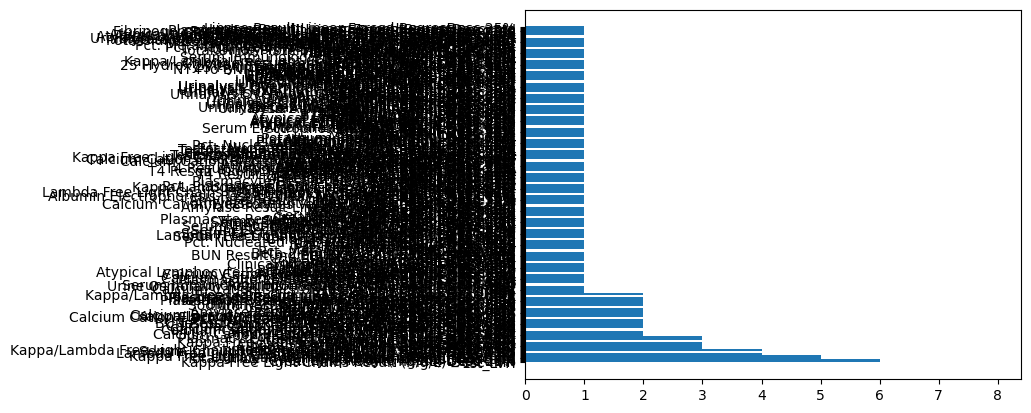

In [94]:
#graphing the frequency 
feature_names = list(sorted_by_frequency.keys())
feature_frequency = list(sorted_by_frequency.values())
plt.barh(feature_names, feature_frequency)

In [62]:
# #create 1D list of features across all models
# features_1D = features_across_models.to_numpy().flatten()

# features_1D_clean = features_1D[~pd.isna(features_1D)]
# #create list of unique features across all models
# features_1D_unique = pd.unique(features_1D_clean)

# #iterate through the 1D list of features to find the frequency of a feature across models
# #save the the feature name as a key and the frequency as the value in a dictionary

# feature_counts = Counter(features_1D_clean)
# feature_counts_dict = dict(feature_counts)


In [65]:
# Create new header names by combining the levels
# Convert MultiIndex tuples to strings
new_columns = ['_'.join(map(str, col)).strip() for col in features_across_models.columns]

# Assign the new columns as the DataFrame's columns
features_across_models.columns = new_columns


### binary dataframe ordered alphabetically

In [74]:
#first, create a dataframe where the features are the index (rows)
# the columns are the models 
#the value for an entry is true or false for if its included in the data 

#set the unique features to the row index 
row_index = features_1D_unique

#set the columns to the headers from earlier
column_index = features_across_models.columns

dict_binary = {}
#pull the features from a column and compare them to 
for column in column_index: 
    column_data_binary = []
    column_data = features_across_models[column]
    for row in row_index: 
        if row in column_data.values:
            column_data_binary.extend([1])
        else:
            column_data_binary.extend([0])
    dict_binary[column] = column_data_binary

df_binary = pd.DataFrame.from_dict(dict_binary, orient = "columns")
df_binary.index = row_index

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
272   NaN
273   NaN
274   NaN
275   NaN
276   NaN
Name: data in_feature reduction_weighting of importance-contribution, Length: 277, dtype: float64
0                                                1st_LVH
1      Kappa/Lambda Free Light Chain Ratio Result Qua...
2                                                    NaN
3                                                    NaN
4                                                    NaN
                             ...                        
272                                                  NaN
273                                                  NaN
274                                                  NaN
275                                                  NaN
276                                                  NaN
Name: top 38 labs_0.25_1, Length: 277, dtype: object
0                                           RadTx Number
1                               Monocyte Result Desc ma

In [77]:
import matplotlib.pyplot as plt

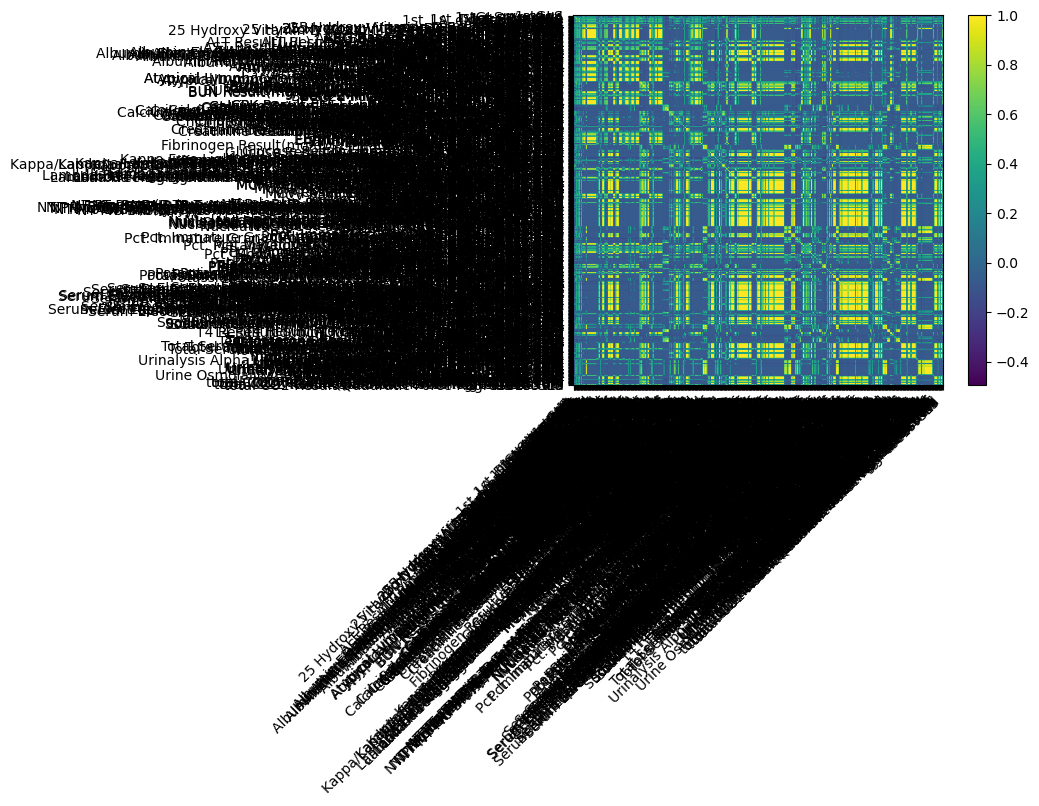

In [82]:
#make correlational matrix 
#first sort alphabetically 
df_binary_sorted_alpha = df_binary.sort_index()
df_binary_transposed = df_binary_sorted_alpha.T # transpose because the features must be columns
matrix = df_binary_transposed.corr()



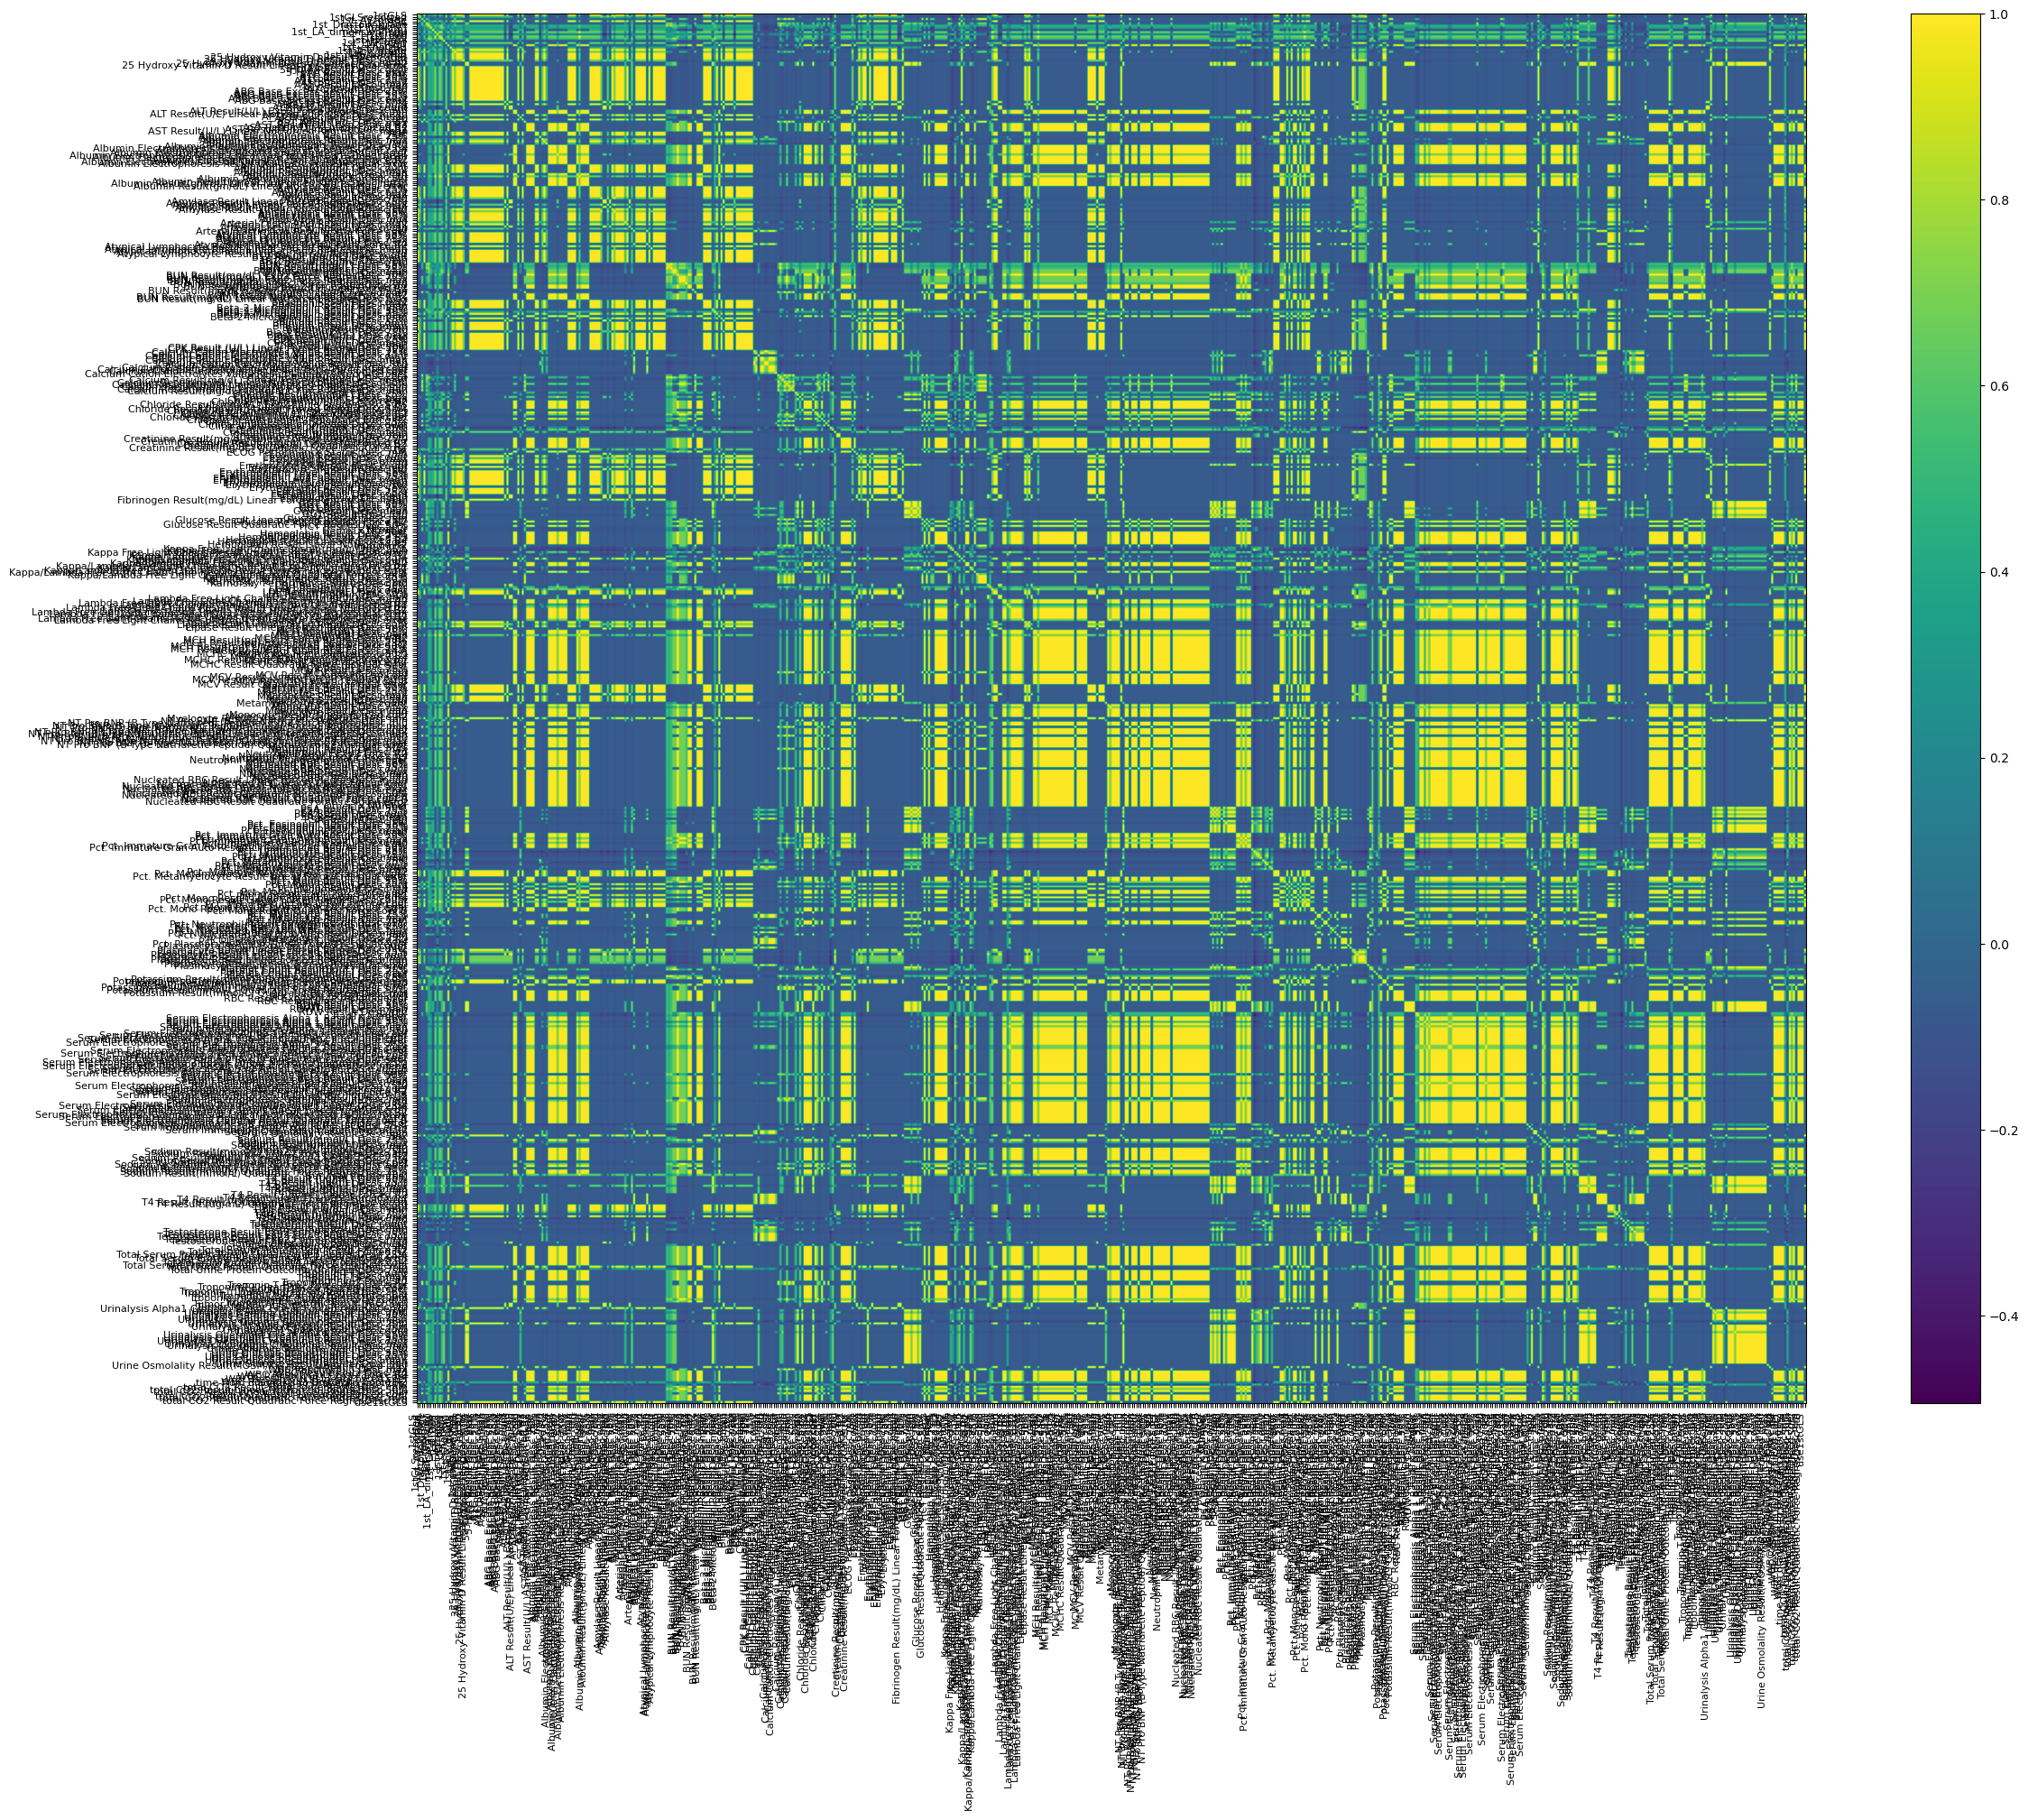

In [89]:
#plotting
fig, ax = plt.subplots(figsize=(30, 20))
plt.imshow(matrix,cmap = "viridis")
plt.colorbar()

variables = []
for i in matrix.columns:
    variables.append(i)

#adding labels
plt.xticks(range(len(matrix)), variables, rotation = 90, ha = 'right', fontsize=8)
plt.yticks(range(len(matrix)), variables, fontsize = 8)
plt.show()

## sorted by frequency

## for top 38 labs

In [58]:
#create 1D list of features across all models
features_1D = features_across_top38.to_numpy().flatten()

features_1D_clean = features_1D[~pd.isna(features_1D)]
#create list of unique features across all models
features_1D_unique = pd.unique(features_1D_clean)

#iterate through the 1D list of features to find the frequency of a feature across models
#save the the feature name as a key and the frequency as the value in a dictionary

feature_counts = Counter(features_1D_clean)
feature_counts_dict = dict(feature_counts)

#sorting the features by frequency
sorted_by_frequency = dict(sorted(feature_counts_dict.items(), key=lambda item: item[1], reverse=True))

#sorting features alphabetically
sorted_by_key = dict(sorted(feature_counts_dict.items()))


In [59]:
df = pd.DataFrame.from_dict(feature_counts_dict, orient = 'index')
# df.to_excel('featureFrequency_2024-07-31_v1.xlsx', sheet_name= "top 38 labs")

with pd.ExcelWriter("featureFrequency_2024-07-31_v1.xlsx", mode = 'a', if_sheet_exists = 'overlay') as writer:
    df.to_excel(writer, sheet_name = "top 38 labs", index = True)

## for all labs svms

In [60]:
#create 1D list of features across all models
features_1D = features_across_allLabs.to_numpy().flatten()

features_1D_clean = features_1D[~pd.isna(features_1D)]
#create list of unique features across all models
features_1D_unique = pd.unique(features_1D_clean)

#iterate through the 1D list of features to find the frequency of a feature across models
#save the the feature name as a key and the frequency as the value in a dictionary

feature_counts = Counter(features_1D_clean)
feature_counts_dict = dict(feature_counts)

#sorting the features by frequency
sorted_by_frequency = dict(sorted(feature_counts_dict.items(), key=lambda item: item[1], reverse=True))

#sorting features alphabetically
sorted_by_key = dict(sorted(feature_counts_dict.items()))


In [61]:
df = pd.DataFrame.from_dict(feature_counts_dict, orient = 'index')
# df.to_excel('featureFrequency_2024-07-31_v1.xlsx', sheet_name= "all labs svm")

with pd.ExcelWriter("featureFrequency_2024-07-31_v1.xlsx", mode = 'a', if_sheet_exists = 'overlay') as writer:
    df.to_excel(writer, sheet_name = "all labs", index = True)

# creating correlation matrix for features across models

### binary dataframe ordered by frequency of data